## Generate E-distance vs MSE plots

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_sizes
import seaborn as sns
from adjustText import adjust_text

formatter = mpl_sizes.get_format("NeurIPS") # options: ICLR, ICML, NeurIPS, InfThesis

In [74]:
e_dist_df_one = pd.read_csv('../preprocessing/etest_results_single_perts.csv')
# e_dist_df_two = pd.read_csv('../preprocessing/etest_results_double_perts.csv')
# e_dist_df_two = e_dist_df_two[e_dist_df_two['Unnamed: 0'].str.contains('\+')]

# e_dist_df = pd.concat([e_dist_df_one, e_dist_df_two])
e_dist_df

,perturbation,edist,pvalue,significant,pvalue_adj,significant_adj
0,AHR,21.757839,0.0001,True,0.008464,True
1,ARRDC3,6.931206,0.0001,True,0.008464,True
2,ATL1,60.535701,0.0001,True,0.008464,True
3,BAK1,0.994366,0.0104,True,0.030877,True
4,BCL2L11,0.082736,0.2923,False,0.499161,False
...,...,...,...,...,...,...
127,S1PR2+SGK1,92.012996,0.0001,True,0.015184,True
131,SGK1+TBX2,69.294760,0.0001,True,0.015184,True
132,SGK1+TBX3,64.002345,0.0001,True,0.015184,True
140,TBX2+TBX3,56.343669,0.0001,True,0.015184,True


In [75]:
e_dist_df = e_dist_df.rename(columns={'Unnamed: 0': 'perturbation'})

In [76]:
df_uce_ind = pd.read_csv('individual_results/1-gene/pert_level_uce_non_adj_full.csv')
df_scgpt_ind = pd.read_csv('individual_results/1-gene/pert_level_scgpt_non_adj_full.csv')
df_gf_ind = pd.read_csv('individual_results/1-gene/pert_level_gf_non_adj_full.csv')
df_scf_ind = pd.read_csv('individual_results/1-gene/pert_level_scfoundation_non_adj_full.csv')
df_scbert_ind = pd.read_csv('individual_results/1-gene/pert_level_scbert_non_adj_full.csv')

# df_uce_ind_two_gene = pd.read_csv('individual_results/2-gene/uce.csv')
# df_scgpt_ind_two_gene = pd.read_csv('individual_results/2-gene/scgpt.csv')
# df_gf_ind_two_gene = pd.read_csv('individual_results/2-gene/gf.csv')
# df_scbert_ind_two_gene = pd.read_csv('individual_results/2-gene/scbert.csv')
# TODO: add scf! 
 
pert_level_results = pd.concat([df_uce_ind, df_scgpt_ind, df_gf_ind, df_scf_ind, df_scbert_ind, df_uce_ind_two_gene, df_scgpt_ind_two_gene, df_gf_ind_two_gene, df_scbert_ind_two_gene])
pert_level_results = pert_level_results.rename(columns={'data.eval_pert': 'perturbation'})
pert_level_results

,Name,End Time,Runtime,Tags,ID,State,Notes,User,Group,Job Type,...,trainer.default_root_dir,trainer.deterministic,trainer.devices,trainer.inference_mode,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,de_test/baseline_mse,epoch,trainer/global_step
0,resilient-deluge-4351,2024-09-18T13:23:07.000Z,30,"CEBPE, eval, norman, replicate_2, split_0.7, uce",0njss9sk,finished,-,NaN,test_mean_norman_0.7,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0
1,brisk-firebrand-4341,2024-09-18T13:20:11.000Z,30,"COL1A1, eval, norman, replicate_1, split_0.6, uce",qe3h1r4e,finished,-,NaN,test_mean_norman_0.6,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0
2,denim-pyramid-4257,2024-09-18T12:54:17.000Z,41,"CBFA2T3, eval, norman, replicate_1, split_0.2,...",mv423ksu,finished,-,NaN,test_mean_norman_0.2,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0
3,devout-paper-4343,2024-09-18T13:20:40.000Z,32,"MAP2K6, eval, norman, replicate_1, split_0.6, uce",8t4smw3b,finished,-,NaN,test_mean_norman_0.6,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0
4,glowing-cloud-4266,2024-09-18T12:56:59.000Z,43,"SNAI1, eval, norman, replicate_1, split_0.2, uce",o1vgtnzr,finished,-,NaN,test_mean_norman_0.2,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,volcanic-yogurt-5076,2024-10-01T06:35:16.000Z,36,"FOXL2+MEIS1, eval, norman_2, replicate_1, scbe...",z4r64ubq,finished,-,NaN,test_mean_norman_0.3,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,NaN,NaN
234,tough-cloud-5098,2024-10-01T06:43:59.000Z,35,"CBFA2T3+PRDM1, eval, norman_2, replicate_2, sc...",040of561,finished,-,NaN,test_mean_norman_0.4,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,NaN,NaN
235,eager-monkey-5101,2024-10-01T06:44:34.000Z,42,"KLF1+MAP2K6, eval, norman_2, replicate_0, scbe...",zdz8i360,finished,-,NaN,test_mean_norman_0.5,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,NaN,NaN
236,smart-mountain-5014,2024-10-01T06:11:29.000Z,42,"FOXA3+FOXL2, eval, norman_2, replicate_2, scbe...",zlx8645j,finished,-,NaN,test_mean_norman_0.1,NaN,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,NaN,NaN


In [77]:
pert_level_results = pert_level_results[['test/mse', 'data.fm', 'data.split', 'perturbation']]
pert_level_results = pert_level_results[pert_level_results['test/mse'].notna()]
pert_level_results_grouped = pert_level_results.groupby(['test/mse', 'data.fm', 'perturbation', 'data.split']).mean().reset_index()
pert_level_results_grouped

,test/mse,data.fm,perturbation,data.split
0,0.248993,scgpt,BAK1,0.2
1,0.249096,uce,BAK1,0.2
2,0.249169,geneformer,BAK1,0.2
3,0.249172,scbert,BAK1,0.2
4,0.250618,scfoundation,BAK1,0.2
...,...,...,...,...
1125,1.458111,scgpt,BPGM+SAMD1,0.7
1126,1.510103,geneformer,IKZF3,0.7
1127,2.150567,scgpt,MAP2K3+MAP2K6,0.7
1128,2.205201,scgpt,BPGM+SAMD1,0.7


In [78]:
# get only the results for perturbation == CEBPE
pert_level_results_grouped = pert_level_results_grouped[pert_level_results_grouped['perturbation'] == 'CEBPE']
pert_level_results_grouped

,test/mse,data.fm,perturbation,data.split
513,0.469909,scbert,CEBPE,0.1
514,0.470515,scgpt,CEBPE,0.1
515,0.470616,uce,CEBPE,0.1
516,0.470810,geneformer,CEBPE,0.1
655,0.511852,scfoundation,CEBPE,0.1
858,0.576401,scfoundation,CEBPE,0.3
873,0.580807,scfoundation,CEBPE,0.4
909,0.586629,scbert,CEBPE,0.3
911,0.586680,geneformer,CEBPE,0.3
912,0.587008,uce,CEBPE,0.3


In [79]:
# Select relevant columns
pert_level_results = pert_level_results[['test/mse', 'perturbation', 'data.split']]

# Group by 'perturbation' and calculate the mean of 'test/mse'
average_mse_per_perturbation = pert_level_results.groupby(['perturbation', 'data.split'])['test/mse'].mean().reset_index()

# Rename the column for clarity
average_mse_per_perturbation = average_mse_per_perturbation.rename(columns={'test/mse': 'average_test_mse'})

# Display the result
average_mse_per_perturbation

,perturbation,data.split,average_test_mse
0,AHR,0.0,0.278863
1,AHR,0.7,0.538213
2,AHR+KLF1,0.0,0.527766
3,AHR+KLF1,0.1,0.613916
4,BAK1,0.0,0.261765
...,...,...,...
230,ZBTB1,0.1,0.571769
231,ZBTB25,0.4,0.537704
232,ZC3HAV1,0.0,0.471049
233,ZC3HAV1,0.3,0.484438


In [80]:
merged_df = pd.merge(e_dist_df, average_mse_per_perturbation, on='perturbation')
merged_df

,perturbation,edist,pvalue,significant,pvalue_adj,significant_adj,data.split,average_test_mse
0,AHR,21.757839,0.0001,True,0.008464,True,0.0,0.278863
1,AHR,21.757839,0.0001,True,0.008464,True,0.7,0.538213
2,BAK1,0.994366,0.0104,True,0.030877,True,0.0,0.261765
3,BAK1,0.994366,0.0104,True,0.030877,True,0.2,0.249409
4,BCORL1,3.683320,0.0001,True,0.008464,True,0.0,0.377546
...,...,...,...,...,...,...,...,...
230,SGK1+TBX3,64.002345,0.0001,True,0.015184,True,0.0,0.391933
231,SGK1+TBX3,64.002345,0.0001,True,0.015184,True,0.1,0.426059
232,TBX2+TBX3,56.343669,0.0001,True,0.015184,True,0.0,0.497510
233,TBX2+TBX3,56.343669,0.0001,True,0.015184,True,0.3,0.788974


In [81]:
merged_df_split = merged_df.groupby('data.split')['average_test_mse'].mean().reset_index()
merged_df_split

,data.split,average_test_mse
0,0.0,0.435599
1,0.1,0.499008
2,0.2,0.498580
3,0.3,0.527531
4,0.4,0.525288
5,0.5,0.513933
6,0.6,0.534421
7,0.7,0.775687


/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


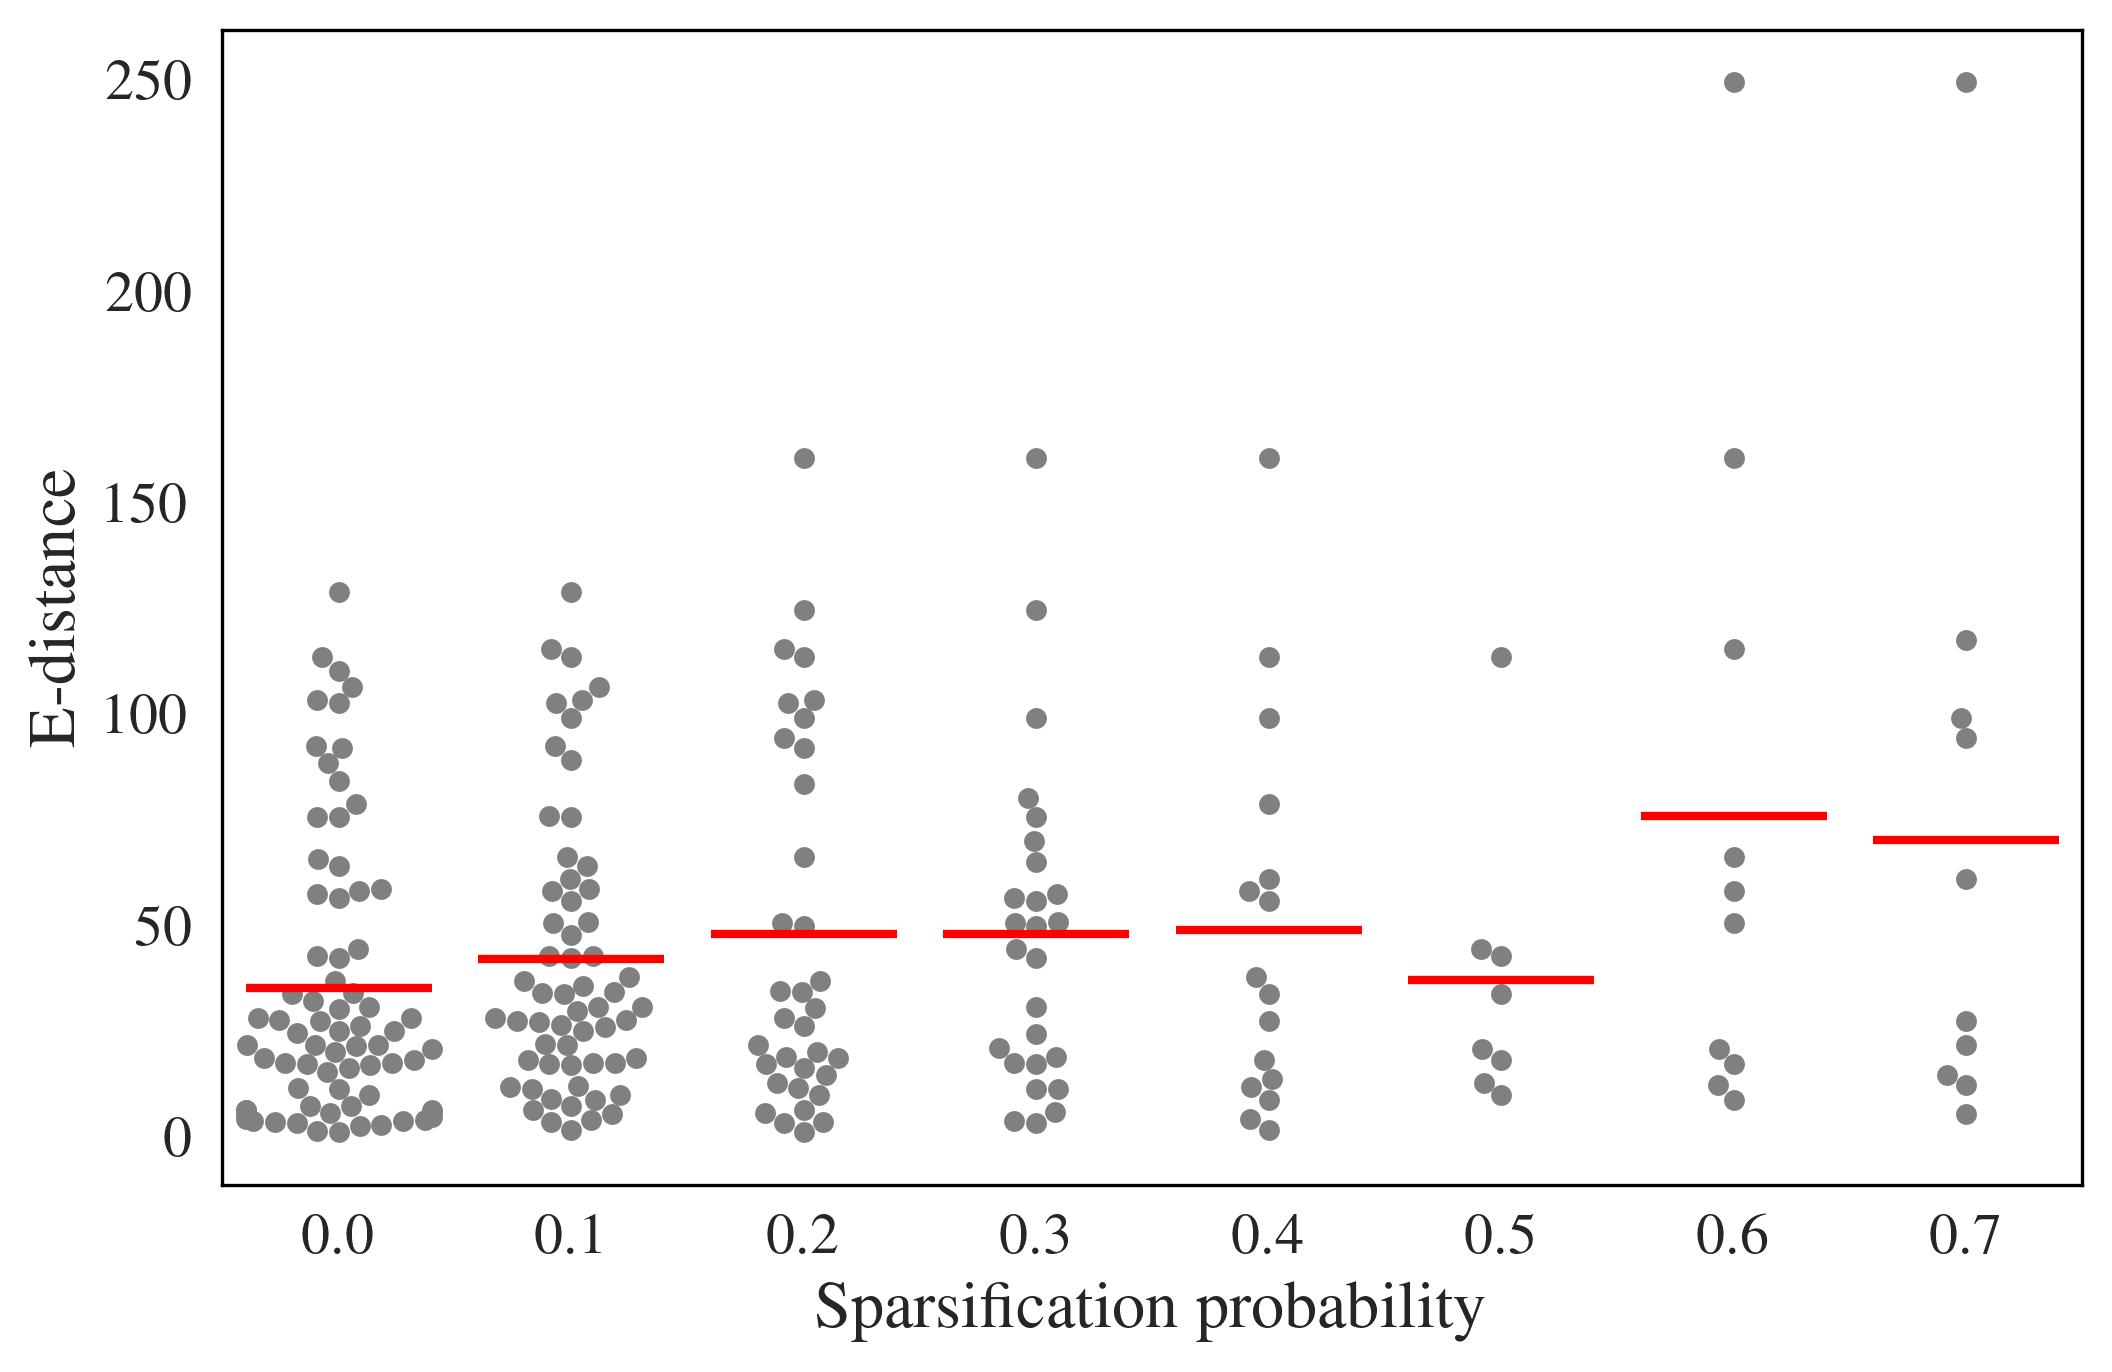

In [82]:
# Create the boxplot
plt.figure(figsize=(8, 5), dpi=300)
swarm = sns.swarmplot(x='data.split', y='edist', data=merged_df, s=5, color='grey')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'red', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="data.split",
            y="edist",
            data=merged_df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=swarm)

# Set the labels and title
plt.xlabel('Sparsification probability', fontsize=16)
plt.ylabel('E-distance', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.gca().set_facecolor('white')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
# Show the plot
plt.savefig('paper_figs/edist_swarmplot.pdf')

In [83]:
def identify_outliers(df, column, threshold=2):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [84]:
from scipy.stats import linregress

# Function to add linear regression line and R^2 annotation
def add_regression_line_and_r2(ax, x, y):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Plot regression line
    ax.plot(x, line, color='grey', zorder=1)

    # Annotate R^2 value
    ax.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.85, 0.65), xycoords='axes fraction',
                fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

In [90]:
outliers_mse = identify_outliers(merged_df, 'average_test_mse')
outliers_edist = identify_outliers(merged_df, 'edist')
outliers = pd.concat([outliers_mse, outliers_edist])
outliers

,perturbation,edist,pvalue,significant,pvalue_adj,significant_adj,data.split,average_test_mse
18,CEBPE,98.999415,0.0001,True,0.008464,True,0.7,1.119834
150,BPGM+SAMD1,60.882396,0.0001,True,0.015184,True,0.7,0.923016
203,FOXL2+POU3F2,94.198987,0.0001,True,0.015184,True,0.7,1.143109
10,CEBPA,249.466217,0.0001,True,0.008464,True,0.6,0.340392
11,CEBPA,249.466217,0.0001,True,0.008464,True,0.7,0.473248
157,CEBPA+KLF1,160.601375,0.0001,True,0.015184,True,0.2,0.512808
158,CEBPA+KLF1,160.601375,0.0001,True,0.015184,True,0.3,0.541367
159,CEBPA+KLF1,160.601375,0.0001,True,0.015184,True,0.4,0.584922
160,CEBPA+KLF1,160.601375,0.0001,True,0.015184,True,0.6,0.726404


In [14]:
from sklearn.cluster import DBSCAN

def annotate_clusters(df, eps=0.1, min_samples=1):
    # Extract coordinates
    coords = df[['edist', 'test/mse']].values

    # Perform DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(coords)
    df['cluster'] = clustering.labels_

    # Annotate one point per cluster
    for cluster in df['cluster'].unique():
        cluster_points = df[df['cluster'] == cluster]
        if not cluster_points.empty:
            representative_point = cluster_points.iloc[0]
            plt.annotate(representative_point['perturbation'], 
                         (representative_point['edist'], representative_point['test/mse']),
                         textcoords="offset points", xytext=(0, 5), ha='center', fontsize=5,
                         color='black')

In [94]:
merged_df 

,perturbation,edist,pvalue,significant,pvalue_adj,significant_adj,data.split,average_test_mse
0,AHR,21.757839,0.0001,True,0.008464,True,0.0,0.278863
1,AHR,21.757839,0.0001,True,0.008464,True,0.7,0.538213
2,BAK1,0.994366,0.0104,True,0.030877,True,0.0,0.261765
3,BAK1,0.994366,0.0104,True,0.030877,True,0.2,0.249409
4,BCORL1,3.683320,0.0001,True,0.008464,True,0.0,0.377546
...,...,...,...,...,...,...,...,...
230,SGK1+TBX3,64.002345,0.0001,True,0.015184,True,0.0,0.391933
231,SGK1+TBX3,64.002345,0.0001,True,0.015184,True,0.1,0.426059
232,TBX2+TBX3,56.343669,0.0001,True,0.015184,True,0.0,0.497510
233,TBX2+TBX3,56.343669,0.0001,True,0.015184,True,0.3,0.788974


In [102]:
plt.figure(figsize=(8, 5), dpi=300)

data_splits = [
    (merged_df[merged_df['data.split'] == 0.0], '0.0'),
    (merged_df[merged_df['data.split'] == 0.1], '0.1'),
    (merged_df[merged_df['data.split'] == 0.2], '0.2'),
    (merged_df[merged_df['data.split'] == 0.3], '0.3'),
    (merged_df[merged_df['data.split'] == 0.4], '0.4'),
    (merged_df[merged_df['data.split'] == 0.5], '0.5'),
    (merged_df[merged_df['data.split'] == 0.6], '0.6'),
    (merged_df[merged_df['data.split'] == 0.7], '0.7')
]

colors = ['#E0A19D', '#C2837D', '#C2695F', '#AB544F', '#AD4137', '#8F2E27', '#711912', '#38120D']

plt.xlabel('E-distance', fontsize=16)
plt.ylabel('MSE', fontsize=16)
# plt.title('scFMs Test MSE vs E-distance')
plt.grid(True)
plt.ylim(0, 1.2)

# if not outliers.empty: 
#     for _, row in outliers.iterrows(): 
#         plt.annotate(row['perturbation'], (row['edist'], row['average_test_mse']), textcoords="offset points", xytext=(-24, -4.2), ha='center', fontsize=12, color='black')
#             
#     for _, row in merged_df[merged_df['average_test_mse'] < 0.3].iterrows():
#         if row['perturbation'] == 'AHR': 
#             plt.annotate(row['perturbation'], (row['edist'], row['average_test_mse']), textcoords="offset points", xytext=(18, -4.2), ha='center', fontsize=12, color='black')
        
# else: 
#     for _, row in merged_df_scfm.iterrows(): 
#         if row['perturbation'] != 'IKZF3': plt.annotate(row['perturbation'], (row['edist'], row['average_test_mse']), textcoords="offset points", xytext=(5, 0), ha='center', fontsize=12, color='black')

for (df, label), color in zip(data_splits, colors):
    plt.scatter(df['edist'], df['average_test_mse'], color=color, label=f'Split {label}', s=12)

texts = []
for _, row in merged_df[(merged_df['average_test_mse'] > 0.97) & (merged_df['edist'] > 95)].iterrows():
    texts.append(plt.text(row['edist'], row['average_test_mse'], row['perturbation'], fontsize=12))

for _, row in merged_df[(merged_df['edist'] > 200) & (merged_df['data.split'] == 0.7)].iterrows():
    texts.append(plt.text(row['edist'], row['average_test_mse'], row['perturbation'], fontsize=12))

for _, row in merged_df[(merged_df['perturbation'] == 'AHR') & (merged_df['average_test_mse'] < 0.4)].iterrows():
    texts.append(plt.text(row['edist'], row['average_test_mse'], row['perturbation'], fontsize=12))
    
for _, row in merged_df[merged_df['perturbation'] == 'IKZF3'].iterrows():
    texts.append(plt.text(row['edist'], row['average_test_mse'], row['perturbation'], fontsize=12))

adjust_text(texts)
    
# add_regression_line_and_r2(plt.gca(), merged_df['edist'], merged_df['average_test_mse'])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=10, facecolor='white', edgecolor='black')

plt.gca().set_facecolor('white')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.savefig('paper_figs/scfm_mse_vs_edist.pdf')
plt.clf()

<Figure size 2400x1500 with 0 Axes>

In [49]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load the .h5ad file
adata = sc.read("../data/norman_2019_raw.h5ad")

KeyboardInterrupt: 

In [13]:
# change adata.obs['guide_ids'] to adata.obs['perturbation']
adata.obs['perturbation'] = adata.obs['guide_ids']
adata.obs = adata.obs.drop(columns=['guide_ids'])

In [14]:
# name every '' column to 'ctrl' 
adata.obs['perturbation'] = adata.obs['perturbation'].replace('', 'ctrl')

/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_60904/1610021118.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['perturbation'] = adata.obs['perturbation'].replace('', 'ctrl')


## Generate UMAPs

In [15]:
# only keep 'IKZF3' and 'ctrl' perturbations
adata_test = adata[adata.obs['perturbation'].isin(['SPI1', 'ctrl'])]

In [16]:
def create_umap(data, pert_name):
    plt.rcParams['figure.dpi'] = 300    
    data = data[data.obs['perturbation'].isin([pert_name, 'ctrl'])]
    sc.pp.normalize_total(data)
    sc.pp.log1p(data)
    sc.pp.highly_variable_genes(data, n_top_genes=2000)
    data = data[:, data.var.highly_variable]
    
    # Perform PCA
    sc.tl.pca(data, n_comps=50)
    
    # Compute the neighborhood graph
    sc.pp.neighbors(data, n_neighbors=15, n_pcs=50)
    
    # Compute UMAP
    sc.tl.umap(data)
    
    # Plot UMAP
    sc.pl.umap(data, color='perturbation', save=f'_{pert_name}.pdf')